# Operazioni algebriche su array e matrici

Abbiamo già visto operazioni algebriche di su array e matrici. Qui le ricapitoliamo e le approfondiamo leggermente.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Operazioni algebriche standard

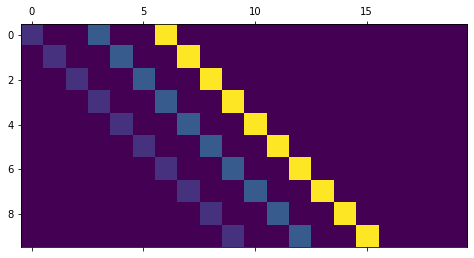

In [2]:
A = np.eye(10,20)
B = np.eye(10,20,3)
C = np.eye(10,20,6)
plt.matshow(A + 2*B+ 7*C)

In [28]:
D = np.diag([1,2,3,4,5,6,7])
D**3

array([[  1,   0,   0,   0,   0,   0,   0],
       [  0,   8,   0,   0,   0,   0,   0],
       [  0,   0,  27,   0,   0,   0,   0],
       [  0,   0,   0,  64,   0,   0,   0],
       [  0,   0,   0,   0, 125,   0,   0],
       [  0,   0,   0,   0,   0, 216,   0],
       [  0,   0,   0,   0,   0,   0, 343]])

## Matrice trasposta

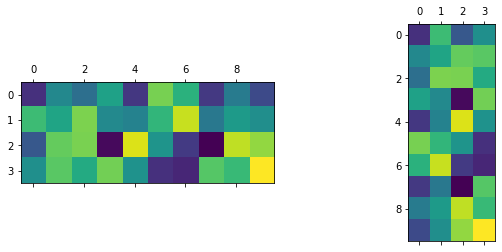

In [3]:
A = np.random.rand(4,10)
B = np.transpose(A)       # La trasposta

fig, ax = plt.subplots(1,2)
fig.set_figwidth(10)
ax[0].matshow(A)
ax[1].matshow(B)
plt.show()

## Prodotto tra matrici (operatore `@`)

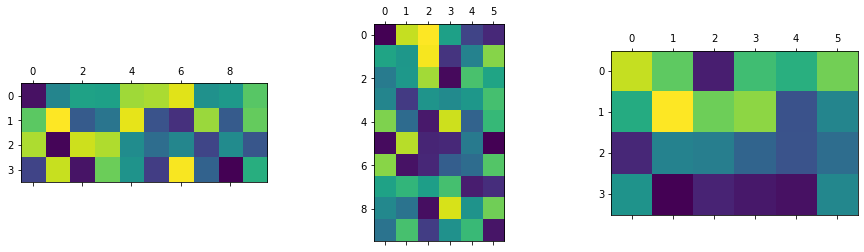

In [49]:
A = np.random.rand(4,10)
B = np.random.rand(10,6)
C = A @ B

fig, ax = plt.subplots(1,3)
fig.set_figwidth(15)
ax[0].matshow(A)
ax[1].matshow(B)
ax[2].matshow(C)
plt.show()

## Matrice inversa

In [36]:
A = np.random.rand(10,10)
B = np.linalg.inv(A)

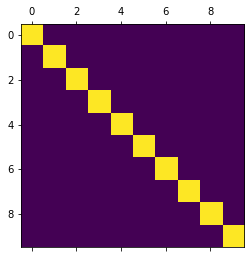

In [40]:
plt.matshow(A @ B)

## Analisi delle matrice

Le matrici sono un concetto importante e utilissimo. Per manipolarle e analizzarle al meglio esistono diverse decomposizioni e manipolazioni. Chiaramente `numpy` implementa le principali. Vediamo

 - Singular Value Decomposition
 - Calcolo degli autovalori

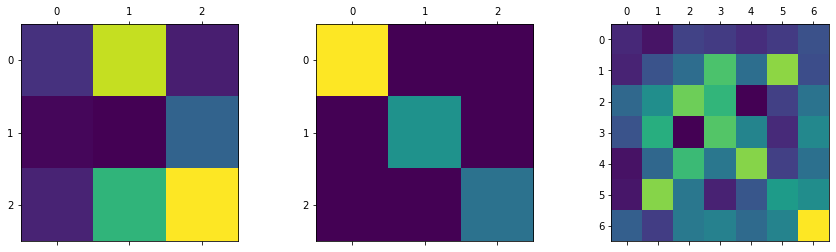

In [9]:
A = np.random.rand(3,7)

# U semi-unitaria
# D diagonale
# V semi-unitaria

U,D1d,V = np.linalg.svd(A) # SVD decomposition

D = np.diag(D1d)

fig, ax = plt.subplots(1,3)
fig.set_figwidth(15)
ax[0].matshow(U)
ax[1].matshow(D)
ax[2].matshow(V)
plt.show()

In [14]:
A = np.random.rand(7,7)
S = A + np.transpose(A)   # S è simmetrica, autovalori reali

e = np.linalg.eigvals(S)  # calcolo degli autovalori

print(e)

[ 6.41191541 -1.48346988 -1.09942744 -0.55191966  0.62074179  1.54042447
  1.2369874 ]


## Soluzione di un sistema lineare

Naturalmente un sistema lineare si può risolvere agevolmente visto che sappiamo come calcolare l'inversa di una matrice. Tuttavia `numpy` ha una funzione apposita per risolvere
$$
A x = b
$$
per $A$ che è una matrice quadrata non singolare.

In [73]:
A = np.random.rand(100,100)
b = np.ones(100)

np.linalg.solve(A,b)

array([ 8.51613322e-02, -2.36813747e-01,  2.91806552e-02, -1.41625241e-02,
        8.52797942e-03, -1.98064487e-01, -7.30585272e-02, -6.47958619e-02,
        1.87983494e-02, -2.11076056e-01, -1.00213564e-01,  8.82073072e-02,
        2.36561844e-01,  3.79969097e-03,  8.77664275e-02,  1.51649416e-01,
       -4.23764349e-02,  1.85556310e-02,  2.40853201e-01, -1.43155273e-01,
       -2.98045537e-01, -1.93519298e-01, -2.47935841e-01, -6.57743846e-02,
       -1.60592614e-01, -4.14810135e-02,  3.61277553e-02,  1.81126987e-01,
        5.56481932e-02,  1.04333359e-01,  1.51386863e-01,  1.02578854e-01,
        4.01495802e-02, -1.28960785e-01, -4.67517420e-02,  1.24859470e-02,
        1.71508326e-01, -2.22973373e-04,  8.25541120e-02,  6.55456055e-02,
       -5.13632988e-02,  2.72415440e-02,  1.34673396e-01,  2.60861744e-03,
       -9.19676806e-03,  4.26164047e-02,  2.82577195e-02,  2.99575000e-01,
        9.46324177e-02, -1.44076004e-01, -3.93558192e-02,  4.97854187e-02,
        2.51858984e-01,  

### Il metodo `solve` può fallire anche se la soluzione esiste

Vediamo un esempio che ha una soluzione, ma in cui la matrice $A$ non è invertibile.

$$
\begin{bmatrix}
1 & 1 \\
2 & 2 
\end{bmatrix} 
\cdot x = 
\begin{bmatrix}
1 \\
2 
\end{bmatrix} 
$$

ha banalmente una soluzione $x=[0,1]^T$ tuttavia il metodo `solve` fallisce.

In [75]:

A = np.array([[1,1],[2,2]])
b = np.array([1,2])

np.linalg.solve(A,b)

LinAlgError: Singular matrix